## 作業
### 請根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print(len(app_train['HOUSETYPE_MODE']))
app_train['HOUSETYPE_MODE'].value_counts()

307511


block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [4]:
print(len(app_train['AMT_CREDIT']))
app_train['AMT_CREDIT'].sort_values().value_counts()

307511


450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1821
360000.0     1743
508495.5     1717
592560.0     1688
             ... 
793417.5        1
1587906.0       1
1595673.0       1
1256103.0       1
1250284.5       1
1916869.5       1
958531.5        1
4031032.5       1
312790.5        1
1007671.5       1
958549.5        1
625882.5        1
626008.5        1
503721.0        1
796140.0        1
1252674.0       1
1252863.0       1
958581.0        1
1592028.0       1
1253524.5       1
626796.0        1
1007361.0       1
1253839.5       1
503559.0        1
1254375.0 

In [14]:
house_data=app_train[['HOUSETYPE_MODE','AMT_CREDIT']]
house_data

,HOUSETYPE_MODE,AMT_CREDIT
0,block of flats,406597.5
1,block of flats,1293502.5
2,NaN,135000.0
3,NaN,312682.5
4,NaN,513000.0
5,NaN,490495.5
6,NaN,1560726.0
7,NaN,1530000.0
8,NaN,1019610.0
9,NaN,405000.0


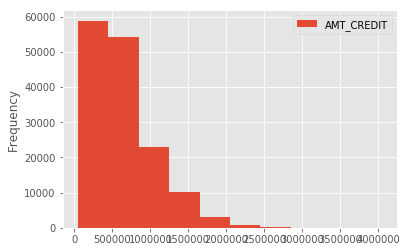

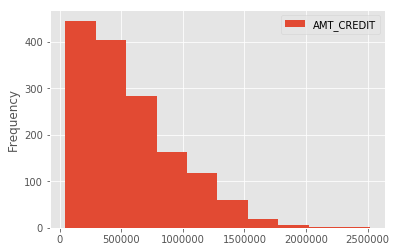

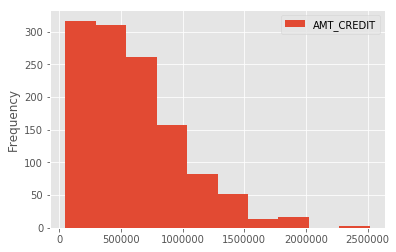

In [17]:
house_data1= house_data[(house_data['HOUSETYPE_MODE'] == 'block of flats')]
house_data1.plot.hist()

house_data2= house_data[(house_data['HOUSETYPE_MODE'] == 'specific housing')]
house_data2.plot.hist()

house_data3= house_data[(house_data['HOUSETYPE_MODE'] == 'terraced house')]
house_data3.plot.hist()

plt.show()

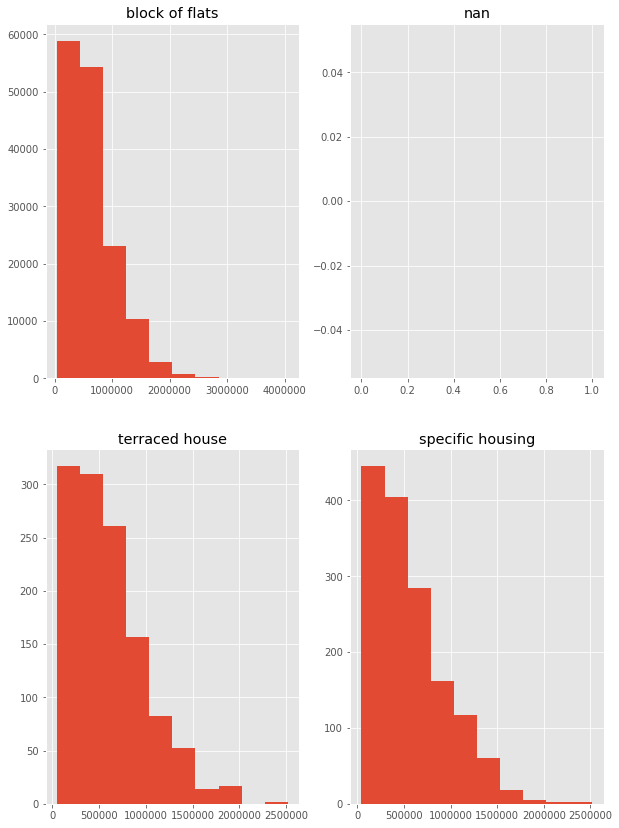

In [19]:
"""
Your Code Here
"""
unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i], "AMT_CREDIT"].hist()
    plt.title(str(unique_house_type[i]))    

plt.show()    